# ELPI

El siguiente script tiene como objetivo utilizar los datos de la Encuesta Longitudinal sobre Primera Infancia para predecir notas a partir de un conjunto de evaluaciones y preguntas realizadas a niños y sus cuidadores principales. Para ello, se explorarán los datos y luego se probarán diferentes modelos de Machine Learning para ver si es posible predecir con una alta tasa de acierto las notas de los niños a partir de las otras variables presentes en las bases de datos disponibles.

Cada niño está identificado por un número de folio único, y la variable target que corresponde a las notas de los niños al año 2017 se llama `c3_a` y tiene la siguiente estructura:

* 1 = Notas de 6.0 o más
* 0 = Notas menores a 6.0

### **Importar Paquetes y Datos**

In [14]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

La base de datos "train" contiene el subset de entrenamiento. Por su parte, la base datos "test" es el subset de testeo. Los subset se crearon ajustando por el desbalance en la distribución de respuestas de la variable target que en este caso son las notas.

In [15]:
pd.options.display.max_columns = 150

# Read in data
train = pd.read_csv('train_dicotomica.csv')
test = pd.read_csv('test_dicotomica.csv')
train.head()

,X,folio,sexo,edad,p2_curso,a1,a3,a4,a5,a6,a8,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21_1,a21_2,a21_3,a21_4,a21_5,a21_6,a21_7,a21_8,a22,a23,b1,b2_1,b2_2,b2_3,b2_4,b2_5,b2_6,b2_7,b2_8,b2_9,b3,b8_1,b8_2,b8_3,b13_1,b13_2,b13_3,b17,b18,b19,b20,b21,b22,b23,b24,c3_a,c4,c5,d1,d2,d3,d4_1,d4_2,d4_3,d4_4,tae_p1,tae_p2,tae_p3,tae_p4,tae_p5,tae_p6,tae_p7,tae_p8,tae_p9,...,mo_8_2017,cesd_p1a_2017,cesd_p1b_2017,cesd_p1c_2017,cesd_p1d_2017,cesd_p1e_2017,cesd_p1f_2017,cesd_p1g_2017,cesd_p1h_2017,cesd_p1i_2017,cesd_p1j_2017,cesd_p2_2017,psi_p1_2017,psi_p2_2017,psi_p3_2017,psi_p4_2017,psi_p5_2017,psi_p6_2017,psi_p7_2017,psi_p8_2017,psi_p9_2017,psi_p10_2017,psi_p11_2017,psi_p12_2017,psi_p13_2017,psi_p14_2017,psi_p15_2017,psi_p16_2017,psi_p17_2017,psi_p18_2017,psi_p19_2017,psi_p20_2017,psi_p21_2017,psi_p22a_2017,psi_p23_2017,psi_p24_2017,psi_p25_2017,psi_p26_2017,psi_p27_2017,psi_p28_2017,psi_p29_2017,psi_p30_2017,psi_p31_2017,psi_p32_2017,psi_p33_2017,psi_p34_2017,psi_p35_2017,psi_p36_2017,pscs_p1_2017,pscs_p2_2017,pscs_p3_2017,pscs_p4_2017,pscs_p5_2017,pscs_p6_2017,pscs_p7_2017,pscs_p8_2017,pscs_p9_2017,pscs_p10_2017,pscs_p11_2017,pscs_p12_2017,pscs_p13_2017,pscs_p14_2017,pscs_p15_2017,pscs_p16_2017,pscs_p17_2017,home_p1_2017,home_p2_2017,home_p3_2017,home_p6_2017,home_p8_2017,home_p12_2017,cesd10_pb_2017,cesd10_int_2017,pscs_pb_2017,psi_pb_total_2017
0,2,100091,1,12,6.0,1,2,1,2,2,3,1,1,2,1,3,3,2,3,3,2,2,1,1,1,2,1,1,2,5,2,1,1,1,2,1,2,2,2,2,2,1,1,2,2,1,2,2,2,1,1,1,1,1,1,1,2,1,1,3,3,1,1,1,1,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,4.0,4.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,4.0,5.0,4.0,2.0,4.0,4.0,4.0,4.0,2.0,4.0,1.0,4.0,2.0,4.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,1.0,4.0,2.0,4.0,4.0,2.0,2.0,4.0,2.0,4.0,4.0,4.0,2.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,15.0,1.0,56.0,81.0
1,3,100121,1,11,6.0,1,2,2,2,2,3,1,1,1,1,2,1,3,1,3,2,2,2,2,2,2,1,2,2,3,2,1,1,2,2,2,2,2,2,2,2,1,2,1,2,2,2,2,2,2,1,1,1,1,1,1,2,1,1,1,1,2,1,1,1,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,72.0,30.0
2,4,100131,1,11,7.0,1,2,2,2,2,1,2,1,3,2,3,2,1,2,2,2,2,2,1,2,1,1,1,2,3,4,2,1,2,1,2,2,2,2,2,2,2,1,2,2,2,2,2,1,1,1,2,2,2,2,3,1,1,3,2,2,2,2,1,1,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,2.0,1.0,0.0,0.0,2.0,2.0,0.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,4.0,3.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,0.0,75.0,33.0
3,6,100161,1,11,6.0,1,2,1,1,2,3,2,1,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,1,2,2,2,2,2,1,2,2,2,2,2,2,2,1,2,2,2,2,2,1,1,1,2,1,1,1,2,1,2,2,2,2,1,1,1,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,4.0,NaN,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,77.0,43.0
4,8,100221,2,12,7.0,2,2,2,2,2,1,2,2,2,2,1,2,2,2,3,2,2,2,2,1,1,1,1,1,3,3,2,1,2,2,2,2,1,2,2,2,2,2,1,2,1,2,2,2,2,2,2,2,2,1,2,1,1,2,2,1,2,2,1,1,2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,4.0,2.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,5.0,4.0,1.0,1.0,2.0,4.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,3.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,4.0,1.0,2.0,2.0,5.0,2.0,2.0,3.0,4.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,16.0,1.0,54.0,87.0


## Análisis Exploratorio

A continuación observaremos nuestros datos, qué tipo de variables tenemos y cómo se distribuyen. También analizaremos los datos perdidos y definiremos los tipos de variables con los que contamos antes de pasar a probar los modelos de Machine Learning.




### *Columnas Integer*

Aquí podemos ver la cantidad de opciones de respuesta que contiene cada variable de tipo `integer`. Observamos en el gráfico que la mayoría de las variables son "Booleans", es decir, con dos opciones de respuesta, una que indica presencia de "x" y otra que indica ausencia de "x".

##### REVISAR POR QUÉ HAY UNA PREGUNTA CON 5MIL Y TANTAS OPCIONES DE RESPUESTA

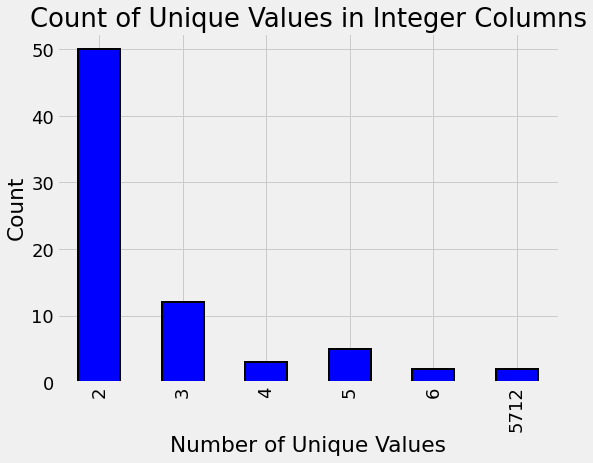

In [16]:
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color = 'blue', 
                                                                             figsize = (8, 6),
                                                                            edgecolor = 'k', linewidth = 2);
plt.xlabel('Number of Unique Values'); plt.ylabel('Count');
plt.title('Count of Unique Values in Integer Columns');

### *Columnas Float*

Ahora observaremos las variables de tipo `float`, que refiere a variables que son continuas. La mejor forma para hacer esto es graficar la distribución de estas variables, agrupando por cada valor de la variable `c3_a` que corresponde a nuestra variable objetivo.

#### Agregar qué significa cada variable

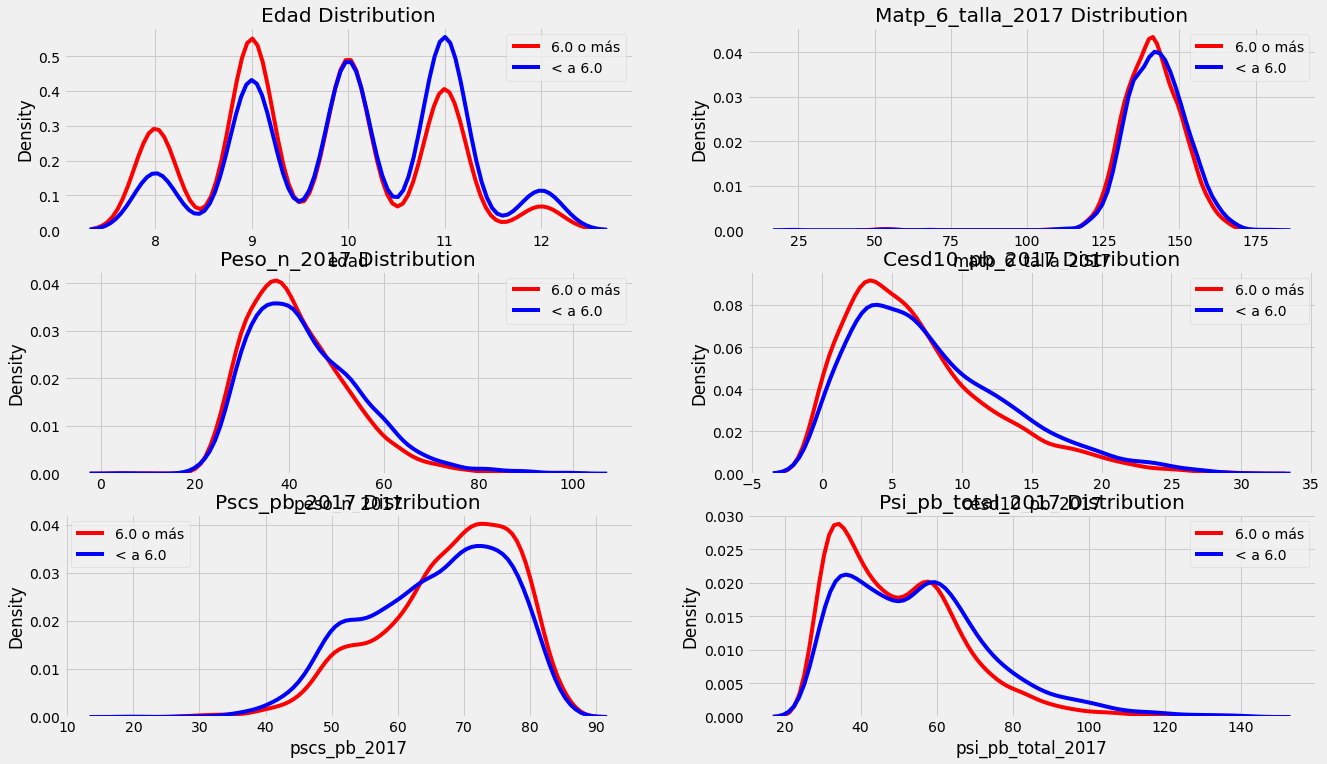

In [18]:

from collections import OrderedDict

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

# Color mapping
colors = OrderedDict({1: 'red', 2: 'blue'})
score_mapping = OrderedDict({1: '6.0 o más', 2: '< a 6.0'})

cols = ['edad','matp_6_talla_2017', 'peso_n_2017', 'cesd10_pb_2017', 'pscs_pb_2017', 'psi_pb_total_2017']
train_num = train[cols]
# Iterate through the float columns
for i, col in enumerate(train_num):
    ax = plt.subplot(4, 2, i + 1)
    # Iterate through the poverty levels
    for school_score, color in colors.items():
        # Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['c3_a'] == school_score, col].dropna(), 
                    ax = ax, color = color, label = score_mapping[school_score])
        
        plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

### *Object Columns*

Confirmamos que solo hay variables representadas por números

In [19]:
train.select_dtypes('object').head()

""
0
1
2
3
4


Para seguir explorando los datos uniremos los data set de entrenamiento y de testeo.

In [20]:
# Add null Target column to test
test['c3_a'] = np.nan
data = train.append(test, ignore_index = True)

## **Exploramos las etiquietas de la variable objetivo**

Hay 4 categorías posibles en nuestra variable objetivo, la primera categoría indica notas de 6.0 a 7.0, la segunda de 5.0 a 6,0, la tercera de 4.0 a 5.0 y la cuarta indica notas menores a 4.0. En le gráfico se observa que la distribución de respuestas a lo largo de las cateogrías no es pareja, están "desbalanceadas". Esto puede traer problemas más adelante para el entrenamiento, puesto que es más difícil que el algoritmo aprenda a clasificar casos para los cuales tiene pocos ejemplos para aprender a clasificar. Pero, nos hicimos cargo de eso antes de importar los datos.

1.0    3148
2.0    2564
Name: c3_a, dtype: int64

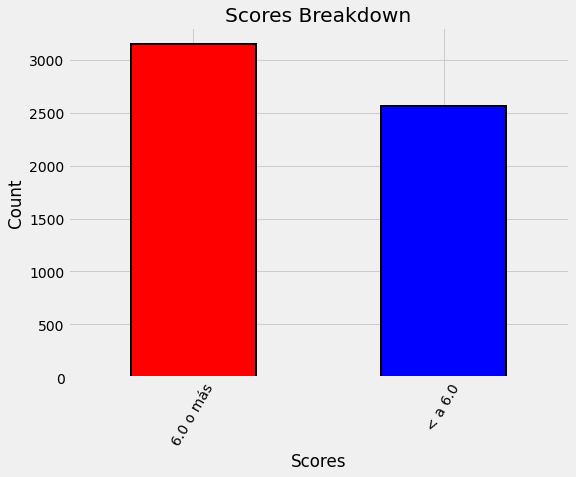

In [21]:
train_labels = data.loc[(data['c3_a'].notnull()), ['c3_a']]

# Value counts of target
label_counts = train_labels['c3_a'].value_counts().sort_index()

# Bar plot of occurrences of each label
label_counts.plot.bar(figsize = (8, 6), 
                      color = colors.values(),
                      edgecolor = 'k', linewidth = 2)

# Formatting
plt.xlabel('Scores'); plt.ylabel('Count'); 
plt.xticks([x - 1 for x in score_mapping.keys()], 
           list(score_mapping.values()), rotation = 60)
plt.title('Scores Breakdown');

label_counts

# **Missing Data**

Miraremos las variable que tienen mayor porcentaje de datos perdidos. Así podremos ir a ver cada una y ver si hay datos que se pueden rescatar, o si las variables que hay que eliminar altera mucho la distribución de la variable obketico.

In [22]:
# Number of missing in each column
missing = pd.DataFrame(data.isnull().sum()).rename(columns = {0: 'total'})

# Create a percentage missing
missing['percent'] = missing['total'] / len(data)

missing.sort_values('percent', ascending = False).head(10).drop('c3_a')

,total,percent
psi_p22a_2017,212,0.029696
peso_n_2017,65,0.009105
matp_6_talla_2017,53,0.007424
home_p12_2017,26,0.003642
home_p8_2017,26,0.003642
home_p6_2017,26,0.003642
home_p3_2017,26,0.003642
home_p2_2017,26,0.003642
home_p1_2017,24,0.003362


Previo a importar los datos a este script, se eliminaron todas aquellas variables que tenían más de un 20% de datos pedidos por lo que no tendremos que lidiar con ese problema. Sin embargo, y solo para ejemplificar plotearemos la variable "psi_p22a_2017", para mostrar cómo se exploran los datos perdidos. Lo importante es observar estos datos para entender por qué se dio la pérdida de datos y si estos son recuperables o no.

In [23]:
def plot_value_counts(df, col, heads_only = False):
    plt.figure(figsize = (8, 6))
    df[col].value_counts().sort_index().plot.bar(color = 'blue',
                                                 edgecolor = 'k',
                                                 linewidth = 2)
    #plt.xlabel(f'{col}'); plt.title(f'{col} Value Counts'); plt.ylabel('Count')
    plt.xlabel({col}); plt.title('Value Counts'); plt.ylabel('Count')
    plt.show();

Esta variable entrega información sobre qué tan buenos padres creen que son lo padres de los niños entrevistados. El gráfico muestrala distribución de las respuestas, las cuales van de 1 = "Creo que soy un(a) muy buen(a) padre(madre)" a 5 = "Creo que soy un(a) muy mal(a) padre(madre)"

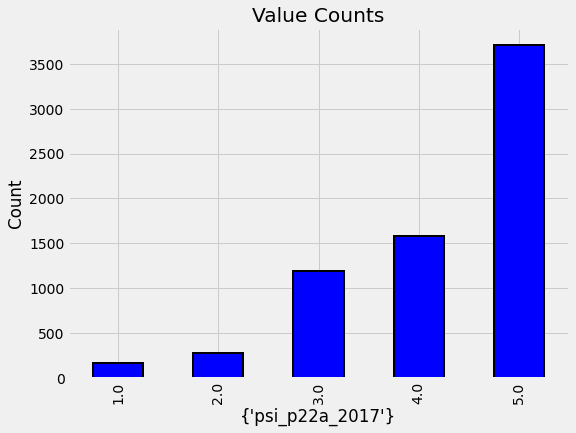

In [24]:
plot_value_counts(data, 'psi_p22a_2017')

Ahora miraremos solo aquellos datos perdidos, y veremos cómo cambia la distribución de nuestra variable de interés cuando quitamos los datos perdidos vs cuando los dejamos. Se ve que la distribución no varía mucho, entonces la variable target no se ve en riesgo si quitamos los perdidos en cuestión. Sin embargo, como en este caso son pocos, privilegiaremos tener mayor n y los dejaremos.

In [25]:
data['psi_p22a_2017-missing'] = data['psi_p22a_2017'].isnull()

In [26]:
data['psi_p22a_2017-missing'].describe()

count      7139
unique        2
top       False
freq       6927
Name: psi_p22a_2017-missing, dtype: object

### a. Distribución de las notas dejando fuera los casos con datos perdidos

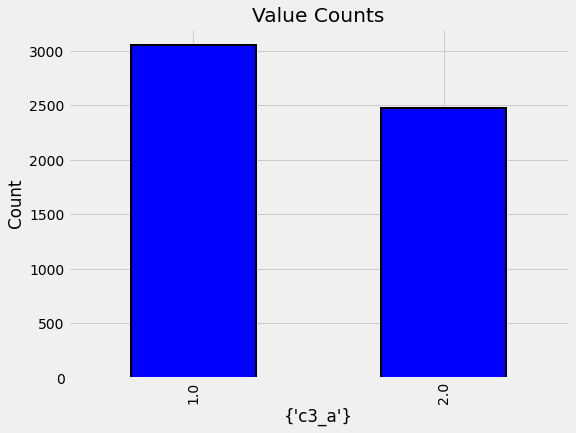

In [27]:
plot_value_counts(data[(data['psi_p22a_2017-missing'] == 0)], 
                  'c3_a')

### b. Distribución de las notas en los datos perdidos.

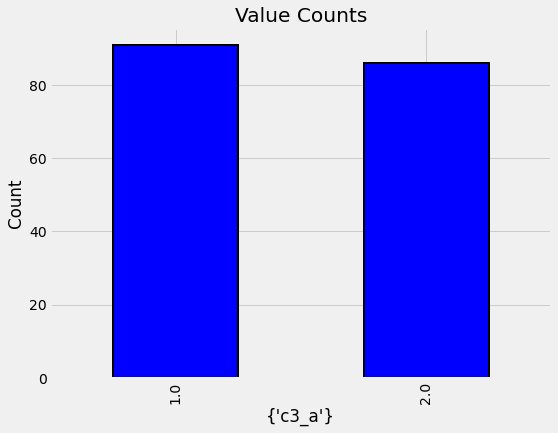

In [28]:
plot_value_counts(data[(data['psi_p22a_2017-missing'] == 1)], 
                  'c3_a')

# **Feature Engineering**

Hasta ahora hemos hecho un análisis exploratorio de los datos, y antes de empezar a probar modelos de Machine Learning es importante definir el tipo de variables que tenemos.

## **Definición de Tipos de Variables**

Hay distintos tipos de categorías de variables:

* Boolean: de tipo "Sí" o "No" (o mas bien "0" y "1")
* Ordinales: números que refieren a una jerarquía de respuestas.
* Continuas: números continuos que indican cantidad o el valor de algo
* Identificación: no es una categoría de variable propiamente tal pero debemos detallar qué variables son de identificación para no integrarlas en el proceso de Machine Learning.

In [29]:
id_ = ['folio', 'c3_a']

In [30]:
ind_bool = ['sexo', 'a1', 'a3', 'a4', 'a5', 'a6', 'a8', 'a12', 'a21_1', 'a21_2', 'a21_3', 'a21_4', 'a21_5', 
            'a21_6', 'a21_7', 'a21_8', 'p1_2017', 'p2_2017', 'p3_2017', 'p4_2017', 'p5_2017', 'p6_2017', 
            'p7_2017', 'p8_2017', 'p9_2017', 'p16_2017', 'mo_1a_2017', 'mo_2_2017',
            'cesd_p2_2017', 'home_p1_2017', 'home_p2_2017', 'home_p3_2017', 'home_p6_2017', 'home_p8_2017',
            'home_p12_2017', 'cesd10_int_2017', 'b2_1', 'b2_2', 'b2_3', 'b2_4', 'b2_5', 'b2_6', 'b2_7', 'b2_8',
            'b2_9', 'b8_1', 'b8_2', 'b8_3', 'b13_1', 'b13_2', 'b13_3', 'b17', 'b18', 'b19', 'b20', 'b21', 'b22',
            'd4_1', 'd4_2', 'd4_3', 'd4_4', 'tae_p1', 'tae_p2', 'tae_p3', 'tae_p4', 'tae_p5', 'tae_p6', 'tae_p7',
            'tae_p8', 'tae_p9', 'tae_p10', 'tae_p11', 'tae_p12', 'tae_p13', 'tae_p14', 'tae_p15', 'tae_p16', 
            'tae_p17', 'tae_p18', 'tae_p19', 'tae_p20', 'tae_p21', 'tae_p22', 'tae_p23']

#ind_bool = ['sexo_1', 'sexo_2', 'a1_1', 'a1_2', 'a3_1', 'a3_2', 'a4_1', 'a4_2', 'a5_1', 'a5_2', 'a6_1', 'a6_2',
 #           'a8_1', 'a8_2', 'a21_1_1', 'a21_1_2', 'a21_2_1', 'a21_2_2', 'a21_3_1', 'a21_3_2', 'a21_4_1', 'a21_4_2',
 #           'a21_5_1', 'a21_5_2', 'a21_6_1', 'a21_6_2', 'a21_7_1', 'a21_7_2', 'a21_8_1', 'a21_8_2', 'b2_1_1',
 #           'b2_1_2', 'b2_2_1', 'b2_2_2', 'b2_3_1', 'b2_3_2', 'b2_4_1', 'b2_4_2', 'b2_5_1', 'b2_5_2',
 #           'b2_6_1', 'b2_6_2', 'b2_7_1', 'b2_7_2', 'b2_8_1', 'b2_8_2', 'b2_9_1', 'b2_9_2', 'b8_1_1', 'b8_1_2',
 #           'b8_2_1', 'b8_2_2', 'b8_3_1', 'b8_3_2', 'b13_1_1', 'b13_1_2', 'b13_2_1', 'b13_2_2', 'b13_3_1',
 #           'b13_3_2', 'b17_1', 'b17_2', 'b18_1', 'b18_2', 'b19_1', 'b19_2', 'b20_1', 'b20_2', 'b21_1', 
 #           'b21_2','b22_1', 'b22_2', 'd4_1_1', 'd4_1_2', 'd4_2_1', 'd4_2_2', 'd4_3_1', 'd4_3_2',
 #           'd4_4_1', 'd4_4_2', 'tae_p1_1', 'tae_p1_0', 'tae_p2_1', 'tae_p2_0', 'tae_p3_1', 'tae_p3_0',
 #           'tae_p4_1', 'tae_p4_0', 'tae_p5_1', 'tae_p5_0', 'tae_p6_1', 'tae_p6_0', 'tae_p7_1', 'tae_p7_0',
 #           'tae_p8_1', 'tae_p8_0', 'tae_p9_1', 'tae_p9_0', 'tae_p10_1', 'tae_p10_0', 'tae_p11_1', 'tae_p11_0',
 #           'tae_p12_1','tae_p12_0', 'tae_p13_1', 'tae_p13_0', 'tae_p14_1', 'tae_p14_0', 'tae_p15_1', 'tae_p15_0',
 #           'tae_p16_1', 'tae_p16_0', 'tae_p17_1', 'tae_p17_0', 'tae_p18_1', 'tae_p18_0', 'tae_p19_1', 'tae_p19_0',
 #           'tae_p20_1', 'tae_p20_0', 'tae_p21_1', 'tae_p21_0', 'tae_p22_1', 'tae_p22_0', 'tae_p23_1', 'tae_p23_0',
 #           'p1_2017_1', 'p1_2017_0', 'p2_2017_1', 'p2_2017_0', 'p3_2017_1', 'p3_2017_0', 'p4_2017_1', 'p4_2017_0',
 #           'p5_2017_1', 'p5_2017_0', 'p6_2017_1', 'p6_2017_0', 'p7_2017_1', 'p7_2017_0', 'p8_2017_1', 'p8_2017_0',
 #           'p9_2017_1', 'p9_2017_0', 'p16_2017_1', 'p16_2017_2', 'mo_1a_2017_1', 'mo_1a_2017_2', 'home_p1_2017_1',
 #           'home_p1_2017_0', 'home_p2_2017_1', 'home_p2_2017_0', 'home_p3_2017_1', 'home_p3_2017_0',
 #           'home_p6_2017_1', 'home_p6_2017_0', 'home_p8_2017_1', 'home_p8_2017_0', 'home_p12_2017_1',
 #           'home_p12_2017_0', 'cesd10_int_2017_1', 'cesd10_int_2017_1', 'mo_2_2017_1', 'mo_2_2017_2']

ind_ordered = ['a11', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a20', 'a22', 'a23', 'b1',
               'b23', 'b24', 'c4', 'c5', 'd1', 'd2', 'd3', 'eclis_p1', 'eclis_p2', 'eclis_p3', 'eclis_p4',
               'eclis_p5', 'eclis_p6', 'eclis_p7', 'eclis_p8', 'mo_3_2017', 'mo_4_2017', 'mo_5_2017',
               'mo_6_2017', 'mo_7_2017', 'mo_8_2017', 'cesd_p1a_2017', 'cesd_p1b_2017', 'cesd_p1c_2017', 
               'cesd_p1d_2017', 'cesd_p1e_2017', 'cesd_p1f_2017', 'cesd_p1g_2017', 'cesd_p1h_2017', 'cesd_p1i_2017',
               'cesd_p1j_2017', 'cesd_p2_2017']

ind_cont = ['edad','matp_6_talla_2017', 'peso_n_2017', 'cesd10_pb_2017', 'pscs_pb_2017', 'psi_pb_total_2017']

apod_odered = ['psi_p1_2017', 'psi_p2_2017', 'psi_p3_2017', 'psi_p4_2017', 'psi_p5_2017', 'psi_p6_2017', 
               'psi_p7_2017', 'psi_p8_2017', 'psi_p9_2017', 'psi_p10_2017', 'psi_p11_2017', 'psi_p12_2017',
               'psi_p13_2017', 'psi_p14_2017', 'psi_p15_2017', 'psi_p16_2017', 'psi_p17_2017', 'psi_p18_2017', 
               'psi_p19_2017', 'psi_p20_2017', 'psi_p21_2017', 'psi_p22a_2017', 'psi_p23_2017', 'psi_p24_2017',
               'psi_p25_2017', 'psi_p26_2017', 'psi_p27_2017', 'psi_p28_2017', 'psi_p29_2017', 'psi_p30_2017', 
               'psi_p31_2017', 'psi_p32_2017', 'psi_p33_2017', 'psi_p34_2017', 'psi_p35_2017', 'psi_p36_2017', 
               'pscs_p1_2017', 'pscs_p2_2017', 'pscs_p3_2017', 'pscs_p4_2017', 'pscs_p5_2017', 'pscs_p6_2017', 
               'pscs_p7_2017', 'pscs_p8_2017', 'pscs_p9_2017', 'pscs_p10_2017', 'pscs_p11_2017', 'pscs_p12_2017',
               'pscs_p13_2017', 'pscs_p14_2017', 'pscs_p15_2017', 'pscs_p16_2017', 'pscs_p17_2017']

In [31]:
x = data[ind_bool + ind_ordered + id_ + ind_cont + apod_odered]

from collections import Counter

print('There are no repeats: ', np.all(np.array(list(Counter(x).values())) == 1))
print('We covered every variable: ', len(x) == data.shape[1])

There are no repeats:  False
We covered every variable:  False


## Buscando variables redundantes


**Correlaciones**

Para chequear si hay variables redundantes y explorar más los datos.

In [32]:
# Create correlation matrix
corr_matrix = data.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.8)]

to_drop

['folio', 'p2_curso', 'cesd10_int_2017']

Arriba vemos cada par de variables que tienen una correlación mayor a 0.8 (que som el curso del niño, y su nivel de depresión). Para encontrar el otro par de cada pareja podemos subsetear `corr_matrix`. 

### 'cesd10_int_2017'

In [33]:
corr_matrix.loc[corr_matrix['cesd10_int_2017'].abs() > 0.8, corr_matrix['cesd10_int_2017'].abs() > 0.8]

,cesd10_pb_2017,cesd10_int_2017
cesd10_pb_2017,1.000000,0.824207
cesd10_int_2017,0.824207,1.000000


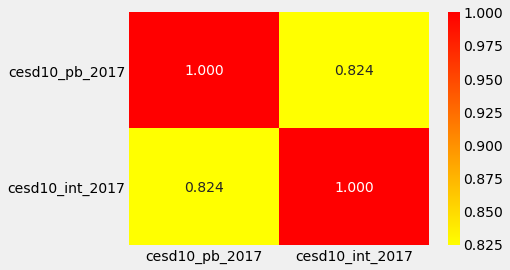

In [34]:
sns.heatmap(corr_matrix.loc[corr_matrix['cesd10_int_2017'].abs() > 0.8, corr_matrix['cesd10_int_2017'].abs() > 0.8],
            annot=True, cmap = plt.cm.autumn_r, fmt='.3f');

### p2_curso

In [35]:
corr_matrix.loc[corr_matrix['p2_curso'].abs() > 0.8, corr_matrix['p2_curso'].abs() > 0.8]

,edad,p2_curso
edad,1.000000,0.827152
p2_curso,0.827152,1.000000


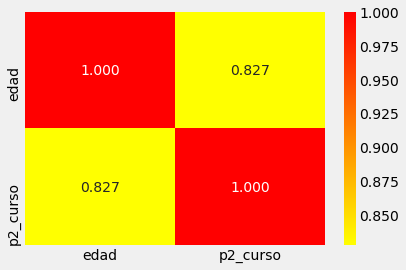

In [36]:
sns.heatmap(corr_matrix.loc[corr_matrix['p2_curso'].abs() > 0.8, corr_matrix['p2_curso'].abs() > 0.8],
            annot=True, cmap = plt.cm.autumn_r, fmt='.3f');

## Midiendo correlaciones con la variable objetivo


### Correlaciones de Pearson

Las variables que correlacionan más fuertemente con nuestra variable target son, con una relación negativa:
* psi_p18_2017: Mi hijo/a no parece aprender tan rápidamente como la mayoría de los niños/as
* tae_p21: Se me olvida lo que aprendo
* tae_p15: Cuando intento hacer algo, todo sale mal
* tae_p8: Generalmente, me meto en problemas
* psi_p21_2017: Mi hijo/a tarda mucho y se le hace difícil acostumbrarse a cosas nuevas

Con una relación positiva:
* edad: edad del niño/a evaluado/a
* tae_p22: Mis compañeros/as piensan que tengo buenas ideas
* tae_p3: Soy asututo/a, soy inteligente
* tae_p6: Soy bueno/a para hacer mis tareas

In [40]:
from scipy.stats import spearmanr

In [41]:
# Use only training data
train_heads = data.loc[data['c3_a'].notnull(), :].copy()

pcorrs = pd.DataFrame(train_heads.corr()['c3_a'].sort_values()).rename(columns = {'c3_a': 'pcorr'}).reset_index()
pcorrs = pcorrs.rename(columns = {'index': 'feature'})

print('Most negatively correlated variables:')
print(pcorrs.head())

print('\nMost positively correlated variables:')
print(pcorrs.dropna().tail())

Most negatively correlated variables:
        feature     pcorr
0  psi_p18_2017 -0.262247
1       tae_p21 -0.229683
2       tae_p15 -0.172759
3        tae_p8 -0.139374
4  psi_p21_2017 -0.135617

Most positively correlated variables:
     feature     pcorr
187     edad  0.152361
188  tae_p22  0.170047
189   tae_p3  0.226755
190   tae_p6  0.272829
191     c3_a  1.000000


### Correlaciones de Spearman

Las variables que correlacionan más fuertemente con nuestra variable target son, con una relación negativa:
* sexo: sexo del niño evaluado (1 = Hombre, 2 = Mujer)
* a20: ¿cuántos días dibujaste, pintaste, bailaste, tocaste algun, instrumento (frecuencia de realizar hobbies)
* b8_1: Lo que tu padre o madre sabe sobre tus amigos, lo sabe porque te pregunta y tú se lo cuentas (1 = Sí, 2 = No)
* b8_3: El cuidador se entera por otras personas sobre los amigos del niño
* p9_2017: No presenta dificultad física

Con una relación positiva:
* c5: Cuánto te gusta ir al colegio
* b24: Cómo es tu relación con tus compañeros y compañeras de curso
* edad: la edad del niño evaluado
* c4: Qué tan importante para ti es que te vaya bien en el colegio

In [44]:
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

feats = []
scorr = []
pvalues = []

# Iterate through each column
for c in data:
    # Only valid for numbers
    if data[c].dtype != 'object':
        feats.append(c)
        
        # Calculate spearman correlation
        scorr.append(spearmanr(train_heads[c], train_heads['c3_a']).correlation)
        pvalues.append(spearmanr(train_heads[c], train_heads['c3_a']).pvalue)
        
scorrs = pd.DataFrame({'feature': feats, 'scorr': scorr, 'pvalue': pvalues}).sort_values('scorr')

In [45]:
print('Most negative Spearman correlations:')
print(scorrs.head())
print('\nMost positive Spearman correlations:')
print(scorrs.dropna().tail())

Most negative Spearman correlations:
     feature     scorr        pvalue
2       sexo -0.112871  1.167921e-17
20       a20 -0.090953  5.705745e-12
42      b8_1 -0.072219  4.653129e-08
44      b8_3 -0.070459  9.789781e-08
105  p9_2017 -0.069646  1.372212e-07

Most positive Spearman correlations:
   feature     scorr        pvalue
58      c5  0.126158  1.059958e-21
55     b24  0.129843  6.665850e-23
3     edad  0.152037  6.939416e-31
57      c4  0.152913  3.160615e-31
56    c3_a  1.000000  0.000000e+00


Mirar las diferencias más importantes entre la correlación de Spearman y Pearson. 

In [46]:
corrs = pcorrs.merge(scorrs, on = 'feature')
corrs['diff'] = corrs['pcorr'] - corrs['scorr']

corrs.sort_values('diff').head()

,feature,pcorr,scorr,pvalue,diff
92,a23,-0.008678,0.010512,4.270187e-01,-0.019190
158,b23,0.077884,0.086886,4.778793e-11,-0.009003
186,c4,0.147301,0.152913,3.160615e-31,-0.005611
170,b1,0.098974,0.102553,7.879439e-15,-0.003579
181,b24,0.126608,0.129843,6.665850e-23,-0.003235


In [47]:
corrs.sort_values('diff').dropna().tail()

,feature,pcorr,scorr,pvalue,diff
164,a22,0.087139,0.085707,8.692679e-11,0.001431
146,folio,0.065462,0.063770,1.411185e-06,0.001692
166,d2,0.087655,0.085791,8.332839e-11,0.001864
157,b3,0.077117,0.072554,4.030089e-08,0.004563
139,a11,0.056040,0.045784,5.375847e-04,0.010256


## Machine Learning

In [48]:
#!pip install imputer
#imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Imput doesn't work so we will use SimpleImputer as suggested by https://github.com/scikit-learn/scikit-learn/issues/16152

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Custom scorer for cross validation
scorer = make_scorer(f1_score, greater_is_better=True, average = 'binary')

In [50]:
# Labels for training
train_labels = np.array(list(data[data['c3_a'].notnull()]['c3_a'].astype(np.uint8)))

# Extract the training data
train_set = data[data['c3_a'].notnull()].drop(columns = ['folio', 'X', 'c3_a'])
test_set = data[data['c3_a'].isnull()].drop(columns = ['folio', 'X', 'c3_a'])

submission_base = test[['folio']].copy()

In [51]:
features = list(train_set.columns)

pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'median')), 
                      ('scaler', MinMaxScaler())])

# Fit and transform training data
train_set = pipeline.fit_transform(train_set)
test_set = pipeline.transform(test_set)

In [52]:
model = RandomForestClassifier(n_estimators=100, random_state=10, 
                               n_jobs = -1)
# 10 fold cross validation
cv_score = cross_val_score(model, train_set, train_labels, cv = 10, scoring = scorer)

print(f'10 Fold Cross Validation F1 Score = {round(cv_score.mean(), 4)} with std = {round(cv_score.std(), 4)}')

10 Fold Cross Validation F1 Score = 0.7313 with std = 0.0206


### Feature Importances

In [53]:
model.fit(train_set, train_labels)

# Feature importances into a dataframe
feature_importances = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
feature_importances.head()

,feature,importance
0,sexo,0.006699
1,edad,0.016673
2,p2_curso,0.012578
3,a1,0.003789
4,a3,0.002301


In [54]:
def plot_feature_importances(df, n = 10, threshold = None):
    """Plots n most important features. Also plots the cumulative importance if
    threshold is specified and prints the number of features needed to reach threshold cumulative importance.
    Intended for use with any tree-based feature importances. 
    
    Args:
        df (dataframe): Dataframe of feature importances. Columns must be "feature" and "importance".
    
        n (int): Number of most important features to plot. Default is 15.
    
        threshold (float): Threshold for cumulative importance plot. If not provided, no plot is made. Default is None.
        
    Returns:
        df (dataframe): Dataframe ordered by feature importances with a normalized column (sums to 1) 
                        and a cumulative importance column
    
    Note:
    
        * Normalization in this case means sums to 1. 
        * Cumulative importance is calculated by summing features from most to least important
        * A threshold of 0.9 will show the most important features needed to reach 90% of cumulative importance
    
    """
    plt.style.use('fivethirtyeight')
    
    # Sort features with most important at the head
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)
    
    # Normalize the feature importances to add up to one and calculate cumulative importance
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    plt.rcParams['font.size'] = 12
    
    # Bar plot of n most important features
    df.loc[:n, :].plot.barh(y = 'importance_normalized', 
                            x = 'feature', color = 'darkgreen', 
                            edgecolor = 'k', figsize = (12, 8),
                            legend = False, linewidth = 2)

    plt.xlabel('Normalized Importance', size = 18); plt.ylabel(''); 
    plt.title(f'{n} Most Important Features', size = 18)
    plt.gca().invert_yaxis()
    
    
    if threshold:
        # Cumulative importance plot
        plt.figure(figsize = (8, 6))
        plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
        plt.xlabel('Number of Features', size = 16); plt.ylabel('Cumulative Importance', size = 16); 
        plt.title('Cumulative Feature Importance', size = 18);
        
        # Number of features needed for threshold cumulative importance
        # This is the index (will need to add 1 for the actual number)
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        
        # Add vertical line to plot
        plt.vlines(importance_index + 1, ymin = 0, ymax = 1.05, linestyles = '--', colors = 'red')
        plt.show();
        
        print('{} features required for {:.0f}% of cumulative importance.'.format(importance_index + 1, 
                                                                                  100 * threshold))
    
    return df

Las variables más importantes de acuerdo al gráfico que viene a continuación son:

 1. Soy bueno(a) para hacer mis tareas
 2. Mi hijo/a no parece aprender tan rápidamente como la mayoría de los niños/a
 3. Peso
 4. Puntaje Escala de Angustia Parental
 5. Talla (altura en cm)
 6. Puntaje Escala Eficacia y Satisfacción Parental
 7. Edad
 8. Puntaje Escala de depresión (aplicada al niño/a)
 9. Soy astuto/a, soy inteligente
 10. Se me olvida lo que aprendo
 11. Curso

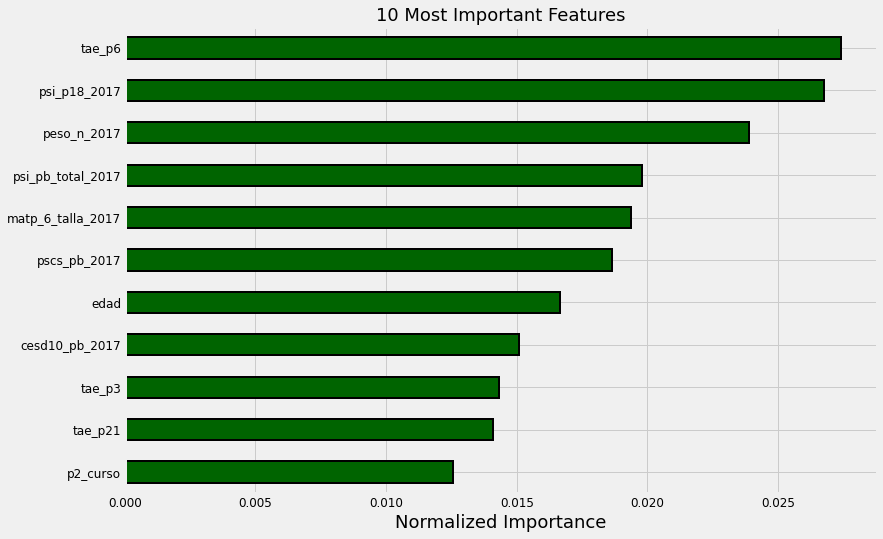

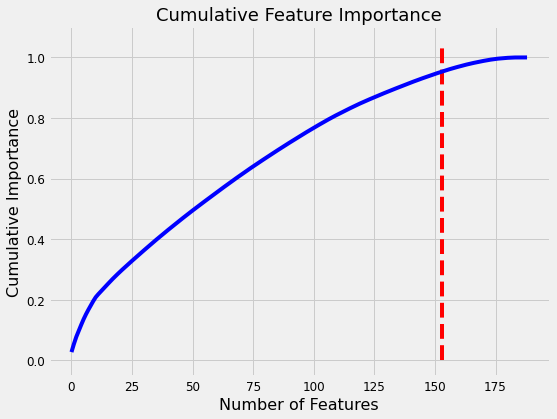

153 features required for 95% of cumulative importance.


In [56]:
norm_fi = plot_feature_importances(feature_importances, threshold=0.95)

In [57]:
def kde_target(df, variable):
    """Plots the distribution of `variable` in `df` colored by the `Target` column"""
    
    colors = {1: 'red', 2: 'orange', 3: 'blue', 4: 'green'}

    plt.figure(figsize = (12, 8))
    
    df = df[df['c3_a'].notnull()]
    
    for level in df['c3_a'].unique():
        subset = df[df['c3_a'] == level].copy()
        sns.kdeplot(subset[variable].dropna(), 
                    label = f'Notas: {level}', 
                    color = colors[int(subset['c3_a'].unique())])

    plt.xlabel(variable); plt.ylabel('Density');
    plt.title('{} Distribution'.format(variable.capitalize()));

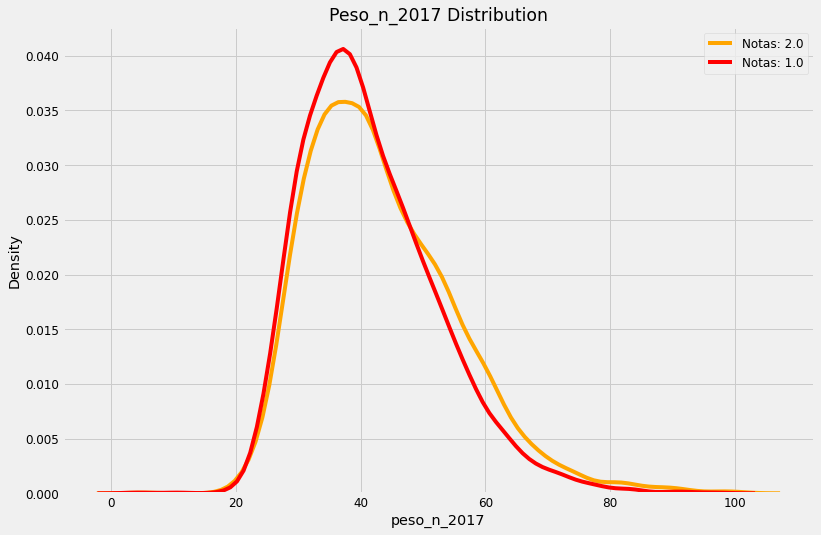

In [58]:
kde_target(data, 'peso_n_2017')

## Selección del modelo

In [59]:
# Model imports
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [60]:
import warnings 
from sklearn.exceptions import ConvergenceWarning

# Filter out warnings from models
warnings.filterwarnings('ignore', category = ConvergenceWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = UserWarning)

# Dataframe to hold results
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model(train, train_labels, model, name, model_results=None):
    """Perform 10 fold cross validation of a model"""
    
    cv_scores = cross_val_score(model, train, train_labels, cv = 10, scoring=scorer, n_jobs = -1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

In [61]:
model_results = cv_model(train_set, train_labels, LinearSVC(), 
                         'LSVC', model_results)

10 Fold CV Score: 0.73777 with std: 0.02135


In [62]:
model_results = cv_model(train_set, train_labels, 
                         GaussianNB(), 'GNB', model_results)

10 Fold CV Score: 0.69944 with std: 0.02077


In [63]:
model_results = cv_model(train_set, train_labels, 
                         MLPClassifier(hidden_layer_sizes=(32, 64, 128, 64, 32)),
                         'MLP', model_results)

10 Fold CV Score: 0.65015 with std: 0.02342


In [64]:
model_results = cv_model(train_set, train_labels, 
                          LinearDiscriminantAnalysis(), 
                          'LDA', model_results)

10 Fold CV Score: 0.73968 with std: 0.02147


In [65]:
model_results = cv_model(train_set, train_labels, 
                         RidgeClassifierCV(), 'RIDGE', model_results)

10 Fold CV Score: 0.74083 with std: 0.02073


In [66]:
for n in [5, 10, 20]:
    print(f'\nKNN with {n} neighbors\n')
    model_results = cv_model(train_set, train_labels, 
                             KNeighborsClassifier(n_neighbors = n),
                             f'knn-{n}', model_results)


KNN with 5 neighbors

10 Fold CV Score: 0.68259 with std: 0.01609

KNN with 10 neighbors

10 Fold CV Score: 0.71376 with std: 0.0149

KNN with 20 neighbors

10 Fold CV Score: 0.72266 with std: 0.01232


In [67]:
from sklearn.ensemble import ExtraTreesClassifier

model_results = cv_model(train_set, train_labels, 
                         ExtraTreesClassifier(n_estimators = 100, random_state = 10),
                         'EXT', model_results)

10 Fold CV Score: 0.72911 with std: 0.02762


## Comparando el rendimiento de los modelos evaluados

In [68]:
model_results = cv_model(train_set, train_labels,
                          RandomForestClassifier(100, random_state=10),
                              'RF', model_results)

10 Fold CV Score: 0.73131 with std: 0.02056


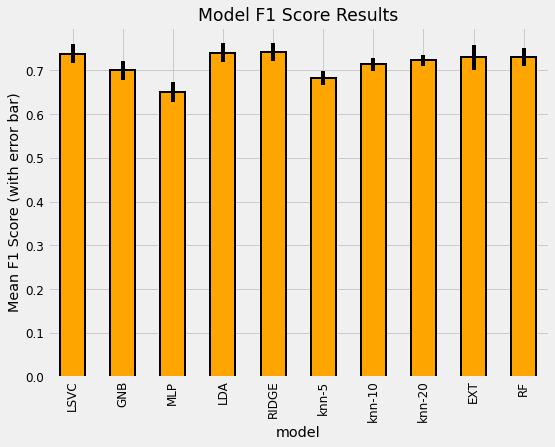

In [69]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                  edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

## Selección de variables
Trataremos de quedarnos solo con aquellos elementos que más aportan al modelo.

In [70]:
train_set = pd.DataFrame(train_set, columns = features)

# Create correlation matrix
corr_matrix = train_set.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

[]

In [71]:
train_set = train_set.drop(columns = to_drop)
train_set.shape

(5712, 189)

In [72]:
test_set = pd.DataFrame(test_set, columns = features)
train_set, test_set = train_set.align(test_set, axis = 1, join = 'inner')
features = list(train_set.columns)

## Eliminación recursiva de variables con Random Forest

In [73]:
from sklearn.feature_selection import RFECV

# Create a model for feature selection
estimator = RandomForestClassifier(random_state = 10, n_estimators = 100,  n_jobs = -1)

# Create the object
selector = RFECV(estimator, step = 1, cv = 3, scoring= scorer, n_jobs = -1)

In [ ]:
selector.fit(train_set, train_labels)

In [ ]:
plt.plot(selector.grid_scores_);

plt.xlabel('Number of Features'); plt.ylabel('Macro F1 Score'); plt.title('Feature Selection Scores');
selector.n_features_

In [89]:
rankings = pd.DataFrame({'feature': list(train_set.columns), 'rank': list(selector.ranking_)}).sort_values('rank')
rankings.head(10)

,feature,rank
0,sexo,1
117,cesd_p1d_2017,1
118,cesd_p1e_2017,1
119,cesd_p1f_2017,1
120,cesd_p1g_2017,1
121,cesd_p1h_2017,1
122,cesd_p1i_2017,1
123,cesd_p1j_2017,1
125,psi_p1_2017,1
126,psi_p2_2017,1


In [90]:
train_selected = selector.transform(train_set)
test_selected = selector.transform(test_set)

In [91]:
# Convert back to dataframe
selected_features = train_set.columns[np.where(selector.ranking_==1)]
train_selected = pd.DataFrame(train_selected, columns = selected_features)
test_selected = pd.DataFrame(test_selected, columns = selected_features)

In [92]:
model_results = cv_model(train_selected, train_labels, model, 'RF-SEL', model_results)

10 Fold CV Score: 0.31058 with std: 0.00971


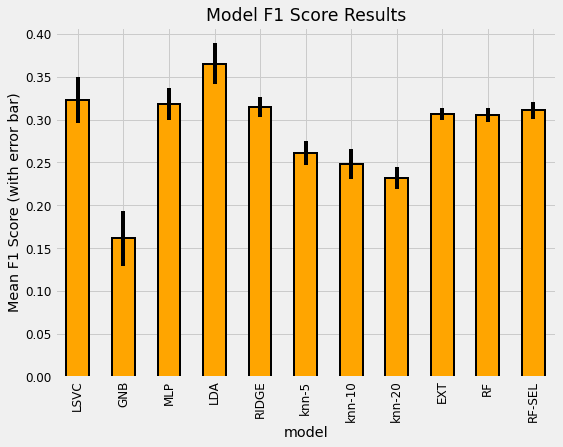

In [93]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                 edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)